# Sparse Hebbian Learning: basics of coding

We are interested here in learning the "optimal" components of a set of images (let's say some "natural", usual images). As there is no supervisor to guide the learning, this is called unsupervised learning. Our basic hypothesis to find the best ("optimal") components will be to assume that *a priori* the most sparse is more plausible. We will implement the derived algorithm in this set of scripts.

Here, we will show the basic operations that are implemented in this package. 

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=4, suppress=True)

## experiments

To test and control for the role of different parameters, we will have a first object (in the [shl_experiments.py](https://github.com/bicv/SparseHebbianLearning/blob/master/shl_scripts/shl_experiments.py) script) that controls a learning experiment. It contains all relevant parameters, but can also keep a trace of the history of some statistics. This is useful to compare the relative efficiency of the different solutions.


In [3]:
tag = 'coding'
homeo_methods = ['None', 'HEH']
homeo_methods = ['None', 'HAP']
homeo_methods = ['None', 'HAP', 'HEH']

record_num_batches = 2**10

seed = 42
np.random.seed(seed)

In [4]:
from shl_scripts.shl_experiments import SHL
shl = SHL()
data = shl.get_data(matname=tag + '_test')
indx = np.random.permutation(data.shape[0])[:record_num_batches]

In [5]:
!ls -l {shl.cache_dir}/{tag}*

-rw-r--r--  1 lolo  staff    2540822 Sep 25 18:08 cache_dir/coding_HAP_dico.pkl
-rw-r--r--  1 lolo  staff    2540822 Sep 25 18:38 cache_dir/coding_HEH_dico.pkl
-rw-r--r--  1 lolo  staff    2540823 Sep 25 17:49 cache_dir/coding_None_dico.pkl
-rw-r--r--  1 lolo  staff  102735488 Sep 25 17:12 cache_dir/coding_test_data.npy


In [6]:
print('number of patches, size of patches = ', data.shape)
print('average of patches = ', data.mean(), ' +/- ', data.mean(axis=1).std())
SE = np.sqrt(np.mean(data**2, axis=1))
print('average energy of data = ', SE.mean(), '+/-', SE.std())

number of patches, size of patches =  (65520, 196)
average of patches =  5.405735690906172e-19  +/-  0.013110254820018232
average energy of data =  0.3172050403807932 +/- 0.09030859334891046


## learning

The actual learning is done in a second object (here ``dico``) from which we can access another set of properties and functions  (see the [shl_learn.py](https://github.com/bicv/SparseHebbianLearning/blob/master/shl_scripts/shl_learn.py) script):

🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶None🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
size of dictionary = (number of filters, size of imagelets) =  (441, 196)
average of filters =  -0.00041515848628678536 +/- 0.002722684927907435
average energy of filters =  1.0 +/- 7.787907812109048e-17


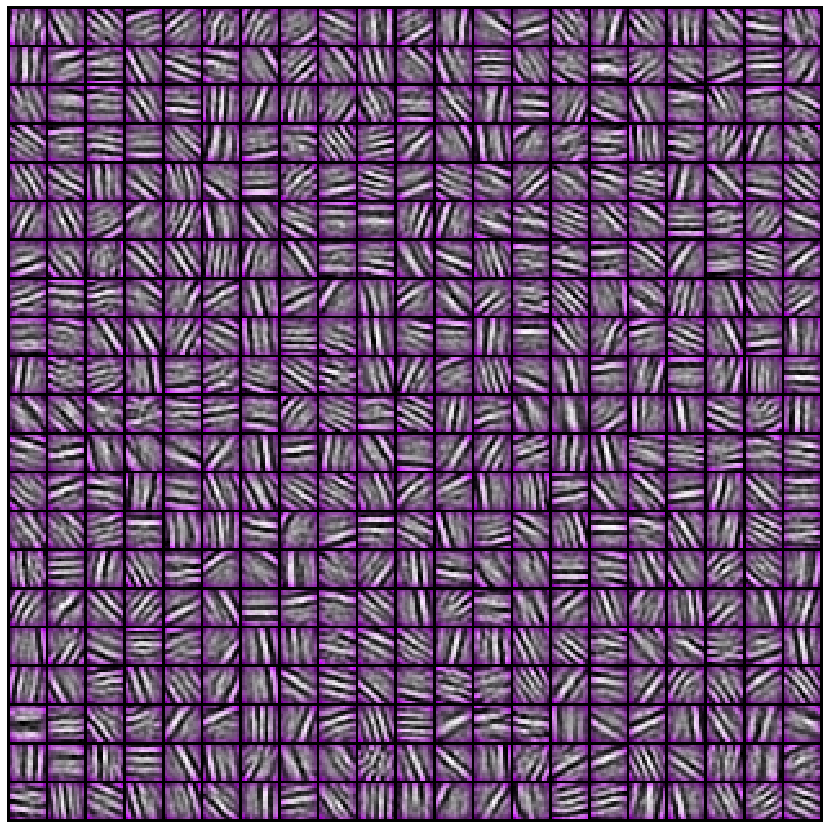

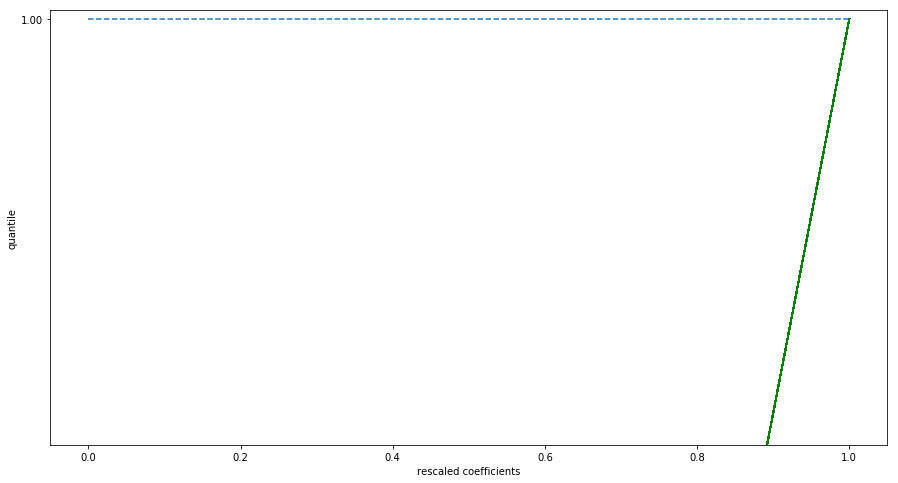

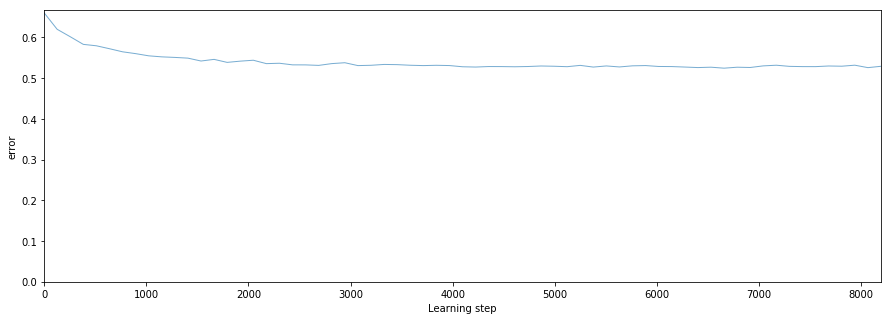

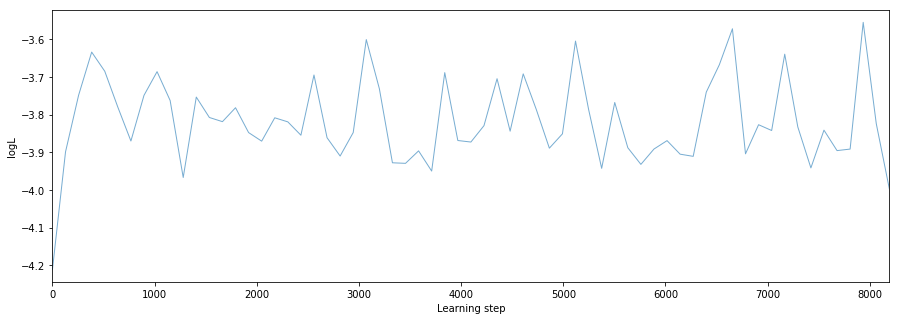

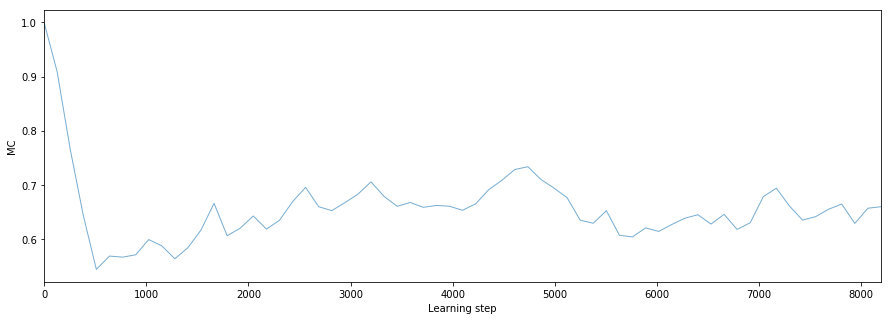

🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶HAP🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
size of dictionary = (number of filters, size of imagelets) =  (441, 196)
average of filters =  -0.000273446013904307 +/- 0.0030108681152762433
average energy of filters =  1.0 +/- 7.606346542007028e-17


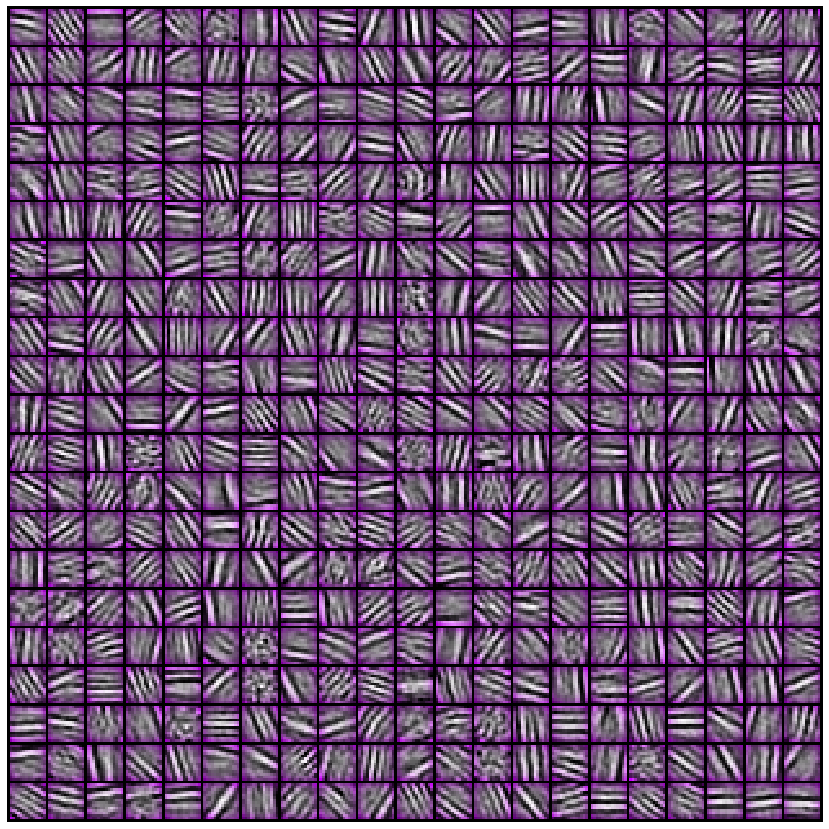

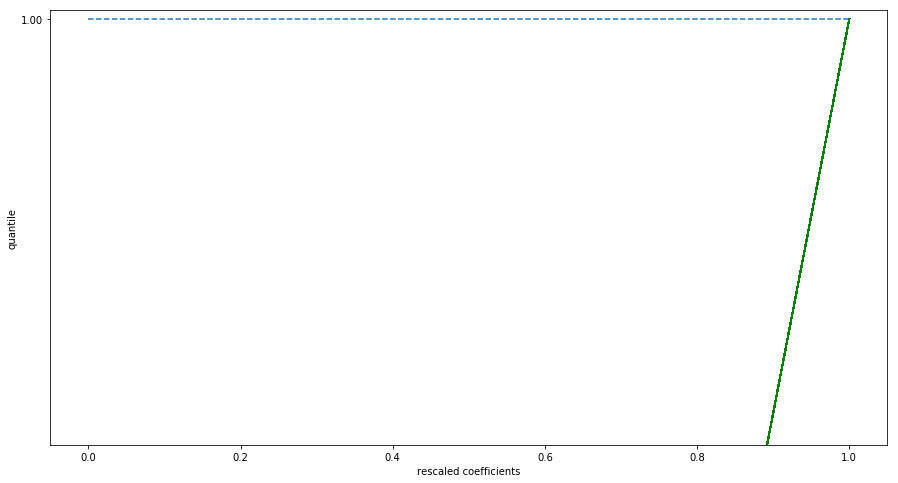

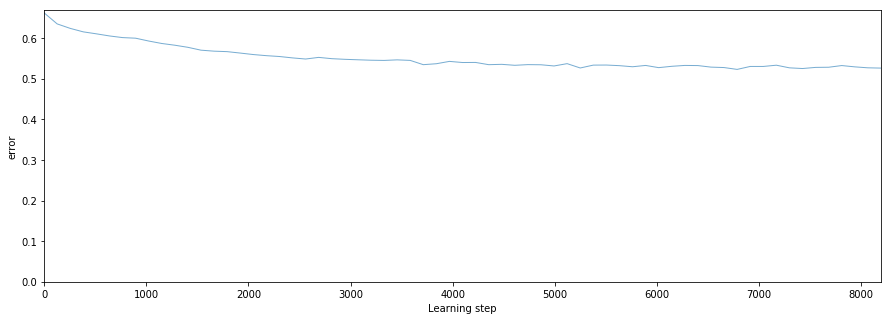

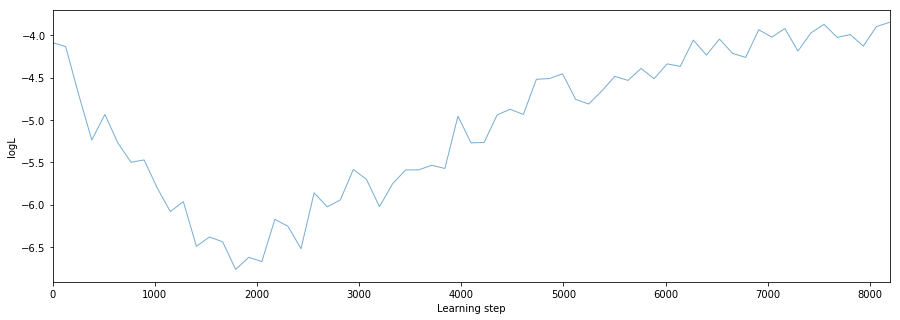

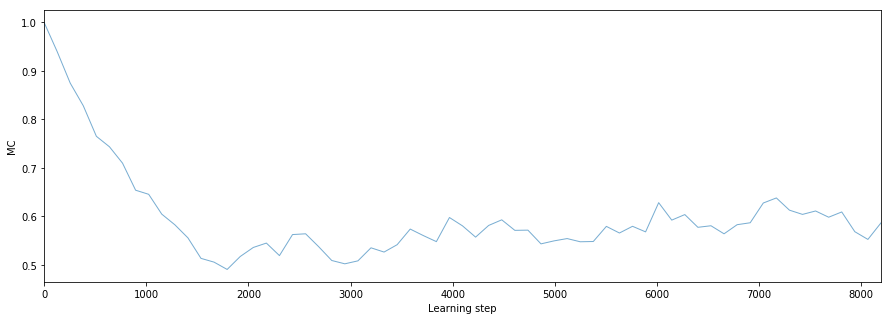

🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶HEH🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
size of dictionary = (number of filters, size of imagelets) =  (441, 196)
average of filters =  -0.0004061543642717955 +/- 0.002584321745775264
average energy of filters =  1.0 +/- 8.475347165817849e-17


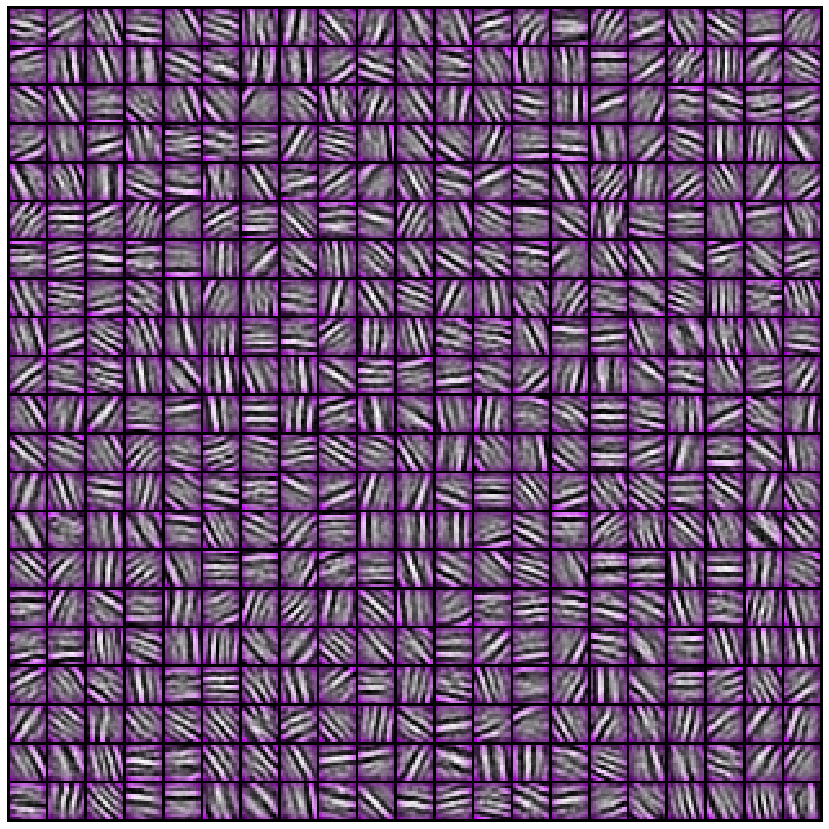

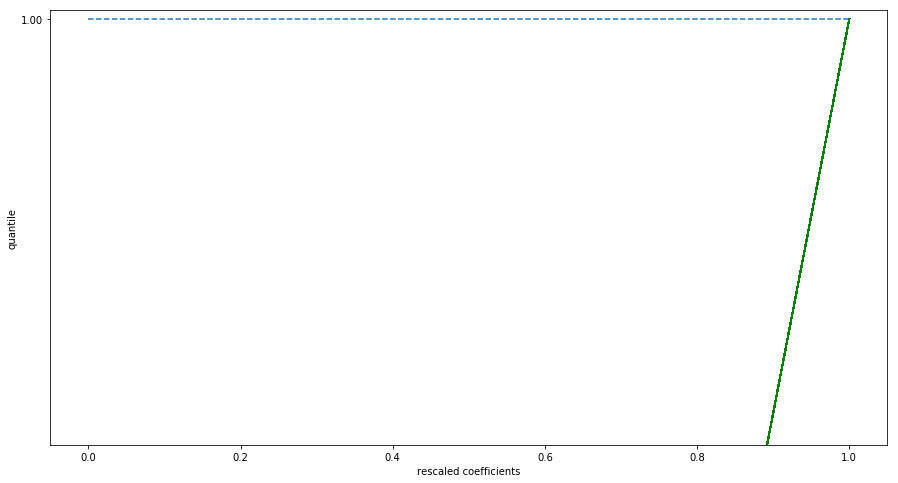

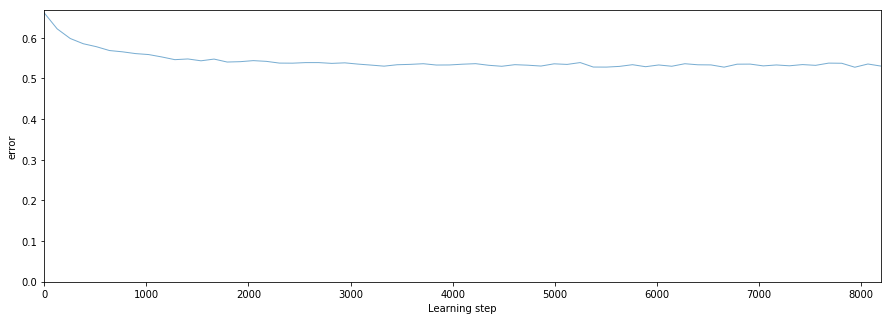

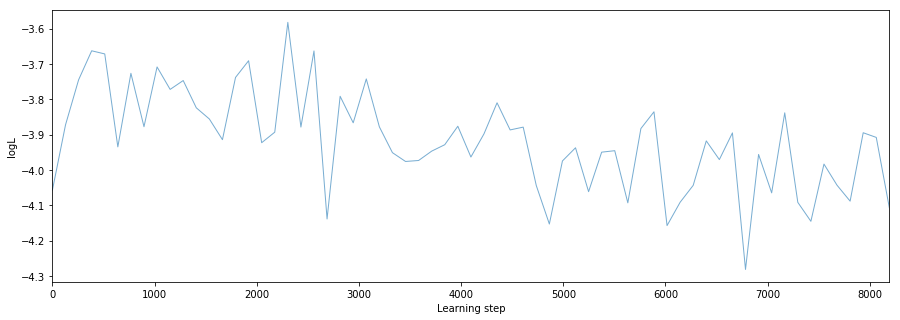

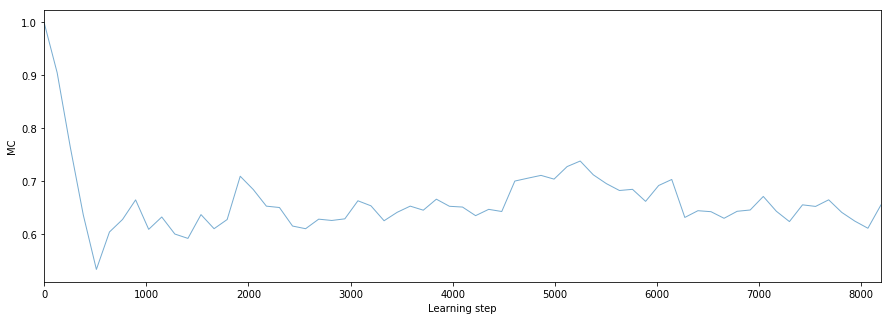

In [7]:
list_figures = ['show_dico', 'time_plot_error', 'time_plot_logL', 'time_plot_MC', 'show_Pcum']

dico = {}
for homeo_method in homeo_methods:
    print(42*'🐶')
    print(19*'🐶' + homeo_method + 19*'🐶')
    print(42*'🐶')
    shl = SHL(homeo_method=homeo_method)
    dico[homeo_method] = shl.learn_dico(data=data, list_figures=list_figures, matname=tag + '_' + homeo_method)

    print('size of dictionary = (number of filters, size of imagelets) = ', dico[homeo_method].dictionary.shape)
    print('average of filters = ',  dico[homeo_method].dictionary.mean(axis=1).mean(), 
          '+/-',  dico[homeo_method].dictionary.mean(axis=1).std())
    SE = np.sqrt(np.sum(dico[homeo_method].dictionary**2, axis=1))
    print('average energy of filters = ', SE.mean(), '+/-', SE.std())
    plt.show()

## coding

The learning itself is done via a gradient descent but is highly dependent on the coding / decoding algorithm. This belongs to a another function (in the [shl_encode.py](https://github.com/bicv/SparseHebbianLearning/blob/master/shl_scripts/shl_encode.py) script)

🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶Non🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒
number of codes, size of codewords =  (1024, 441)
average of codewords =  0.03155251514392285
average std of codewords =  0.20176970663523194
l0-sparseness of codewords =  0.031281001984126984
std of the average of individual patches =  0.013944208613221494


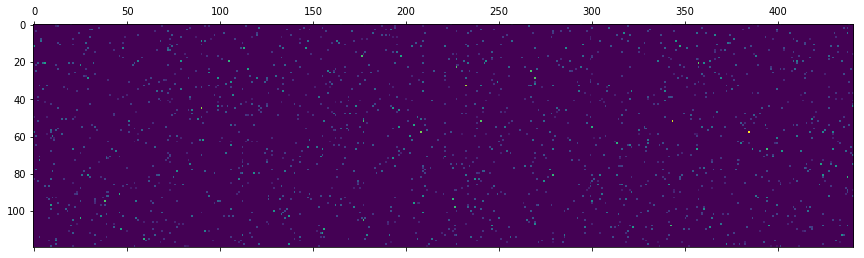

<Figure size 1080x216 with 0 Axes>

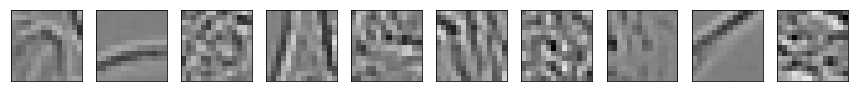

number of codes, size of reconstructed images =  (1024, 196)


<Figure size 1080x216 with 0 Axes>

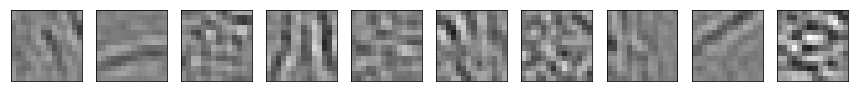

<Figure size 1080x216 with 0 Axes>

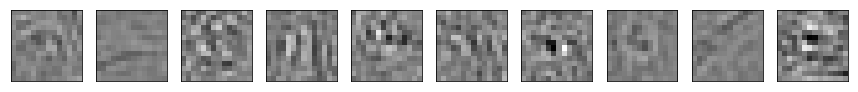

average of data patches =  0.0005292290528058102 +/- 0.01294243662199205
average of residual patches =  0.0072984638771044635 +/- 0.010867614296747258
median energy of data =  0.3207632291015253
average energy of data =  0.31577017885349845 +/- 0.08954905884368769
average error =  0.0072984638771044635 +/- 0.22422460929516086
average energy of residual =  0.21415201384396954 +/- 0.06684951723913368
median energy of residual =  0.21589080454613213
average gain of coding =  1.5033900785225693 +/- 0.21958719811417823
🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒
number of codes, size of codewords =  (1024, 441)
average of codewords =  0.0310949306294288
average std of codewords =  0.19849047059154393
l0-sparseness of codewords =  0.031349649234693876
std of the average of individual patches =  0.013912680925495392


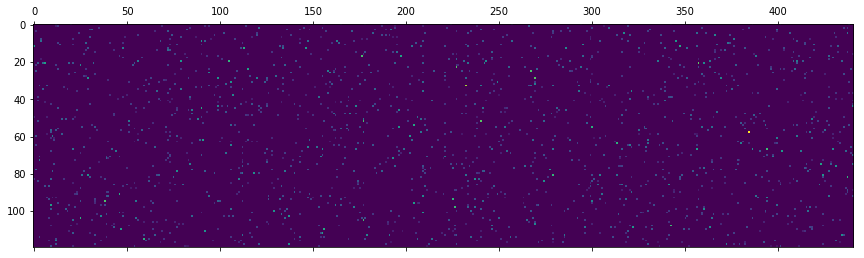

<Figure size 1080x216 with 0 Axes>

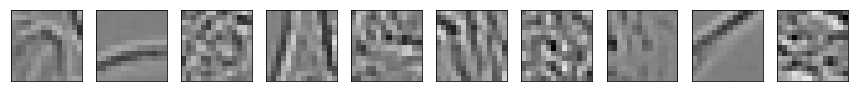

number of codes, size of reconstructed images =  (1024, 196)


<Figure size 1080x216 with 0 Axes>

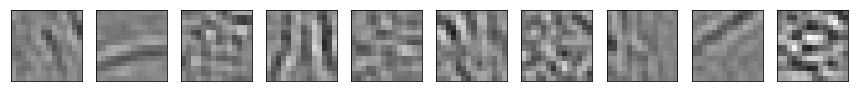

<Figure size 1080x216 with 0 Axes>

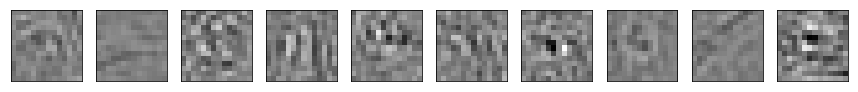

average of data patches =  0.0005292290528058102 +/- 0.01294243662199205
average of residual patches =  0.007156083524260571 +/- 0.010499819358465461
median energy of data =  0.3207632291015253
average energy of data =  0.31577017885349845 +/- 0.08954905884368769
average error =  0.007156083524260571 +/- 0.21853527092782382
average energy of residual =  0.20876875865201994 +/- 0.06499599665978062
median energy of residual =  0.21316019378992584
average gain of coding =  1.5400019966940306 +/- 0.2102961925652271
🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒
number of codes, size of codewords =  (1024, 441)
average of codewords =  0.031074104573695017
average std of codewords =  0.19838088619774813
l0-sparseness of codewords =  0.03137622236394558
std of the average of individual patches =  0.013440754400011768


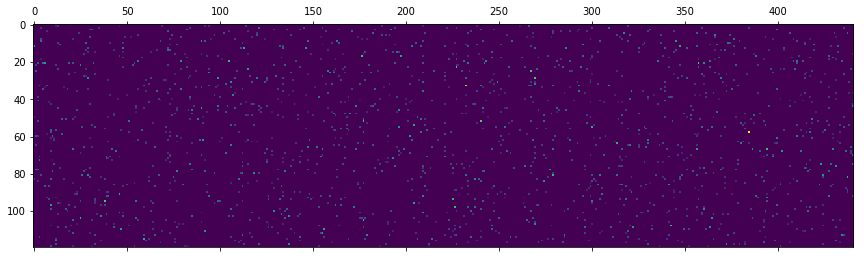

<Figure size 1080x216 with 0 Axes>

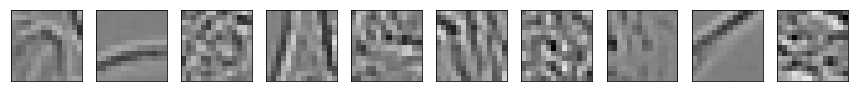

number of codes, size of reconstructed images =  (1024, 196)


<Figure size 1080x216 with 0 Axes>

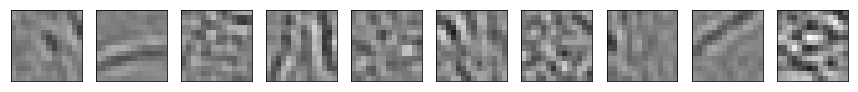

<Figure size 1080x216 with 0 Axes>

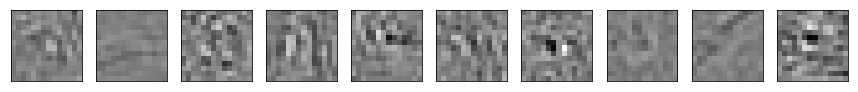

average of data patches =  0.0005292290528058102 +/- 0.01294243662199205
average of residual patches =  0.007099225989010748 +/- 0.010426637907412526
median energy of data =  0.3207632291015253
average energy of data =  0.31577017885349845 +/- 0.08954905884368769
average error =  0.007099225989010748 +/- 0.2182489688050417
average energy of residual =  0.20849291911182521 +/- 0.0649131271341707
median energy of residual =  0.21319810869841488
average gain of coding =  1.5421568970219572 +/- 0.20964571944758828
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶HAP🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒
number of codes, size of codewords =  (1024, 441)
average of codewords =  0.03167395978135799
average std of codewords =  0.20223835986393165
l0-sparseness of codewords =  0.031327504960317464
std of the average of individual patches =  0.01539320027405297


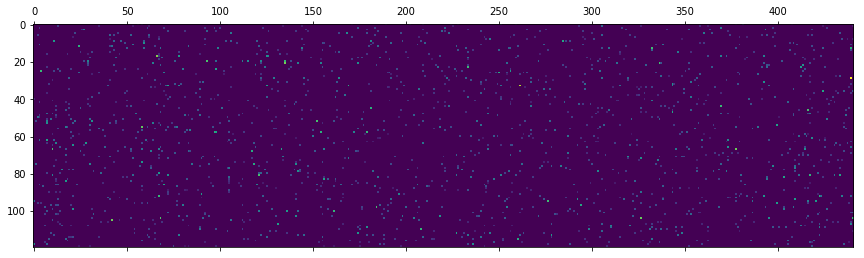

<Figure size 1080x216 with 0 Axes>

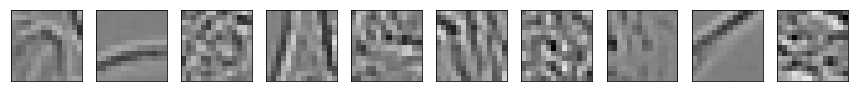

number of codes, size of reconstructed images =  (1024, 196)


<Figure size 1080x216 with 0 Axes>

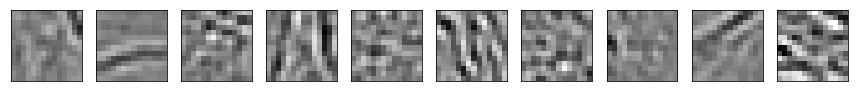

<Figure size 1080x216 with 0 Axes>

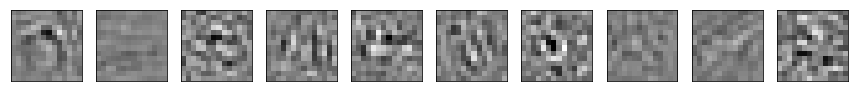

average of data patches =  0.0005292290528058102 +/- 0.01294243662199205
average of residual patches =  0.005826886535277369 +/- 0.009911952567710004
median energy of data =  0.3207632291015253
average energy of data =  0.31577017885349845 +/- 0.08954905884368769
average error =  0.005826886535277369 +/- 0.22572609679335892
average energy of residual =  0.21512289902264645 +/- 0.06861750284258457
median energy of residual =  0.21926369168095902
average gain of coding =  1.501583856353043 +/- 0.2343698758389129
🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒
number of codes, size of codewords =  (1024, 441)
average of codewords =  0.031273073089253915
average std of codewords =  0.19902779041123939
l0-sparseness of codewords =  0.03138065121882086
std of the average of individual patches =  0.015292995117081284


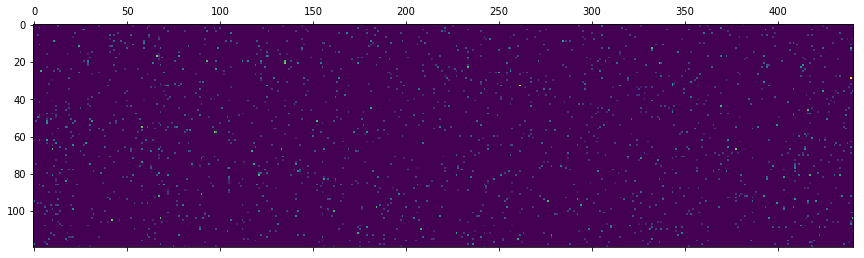

<Figure size 1080x216 with 0 Axes>

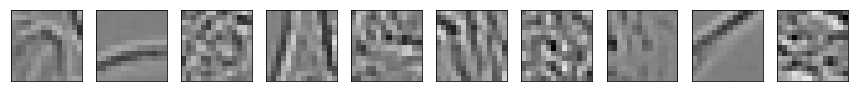

number of codes, size of reconstructed images =  (1024, 196)


<Figure size 1080x216 with 0 Axes>

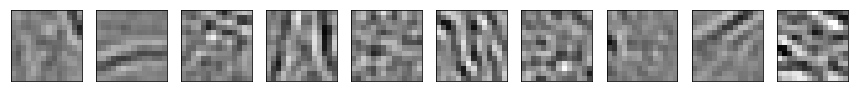

<Figure size 1080x216 with 0 Axes>

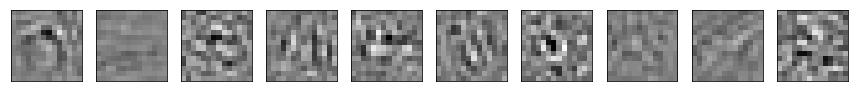

average of data patches =  0.0005292290528058102 +/- 0.01294243662199205
average of residual patches =  0.005757980497501418 +/- 0.00977981697377909
median energy of data =  0.3207632291015253
average energy of data =  0.31577017885349845 +/- 0.08954905884368769
average error =  0.005757980497501418 +/- 0.22050626621541375
average energy of residual =  0.2103989139260664 +/- 0.0662454888909745
median energy of residual =  0.21693742449103026
average gain of coding =  1.5341842077496006 +/- 0.23077887185955376
🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒
number of codes, size of codewords =  (1024, 441)
average of codewords =  0.03106816840394037
average std of codewords =  0.19812347540334202
l0-sparseness of codewords =  0.031511302437641726
std of the average of individual patches =  0.013426907235628775


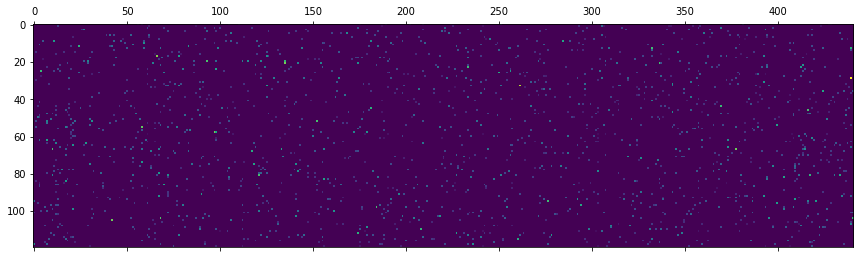

<Figure size 1080x216 with 0 Axes>

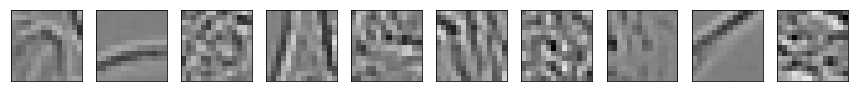

number of codes, size of reconstructed images =  (1024, 196)


<Figure size 1080x216 with 0 Axes>

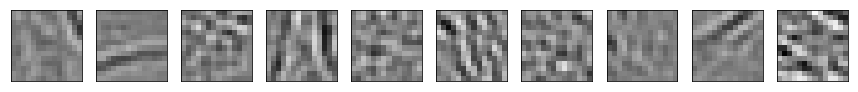

<Figure size 1080x216 with 0 Axes>

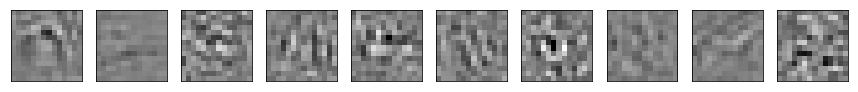

average of data patches =  0.0005292290528058102 +/- 0.01294243662199205
average of residual patches =  0.005108979650507523 +/- 0.009769613580863468
median energy of data =  0.3207632291015253
average energy of data =  0.31577017885349845 +/- 0.08954905884368769
average error =  0.005108979650507523 +/- 0.22079421973901295
average energy of residual =  0.2108000428266537 +/- 0.06587511736239865
median energy of residual =  0.21587523924807248
average gain of coding =  1.5293048099239972 +/- 0.2289644513366903
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶HEH🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒
number of codes, size of codewords =  (1024, 441)
average of codewords =  0.03161348645852171
average std of codewords =  0.20248215999894612
l0-sparseness of codewords =  0.03126771541950114
std of the average of individual patches =  0.012489996723802431


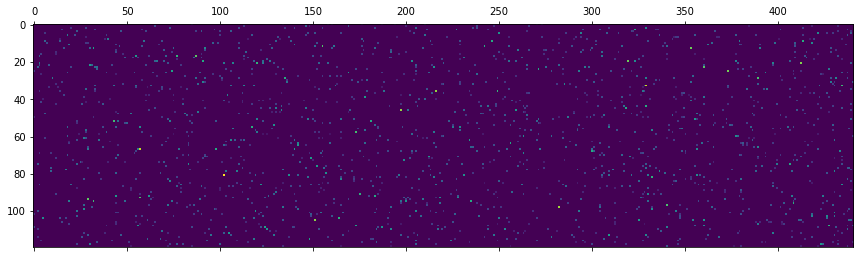

<Figure size 1080x216 with 0 Axes>

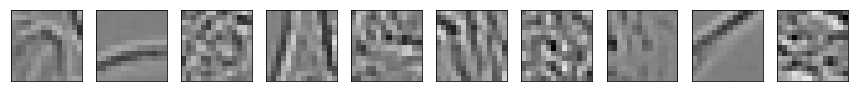

number of codes, size of reconstructed images =  (1024, 196)


<Figure size 1080x216 with 0 Axes>

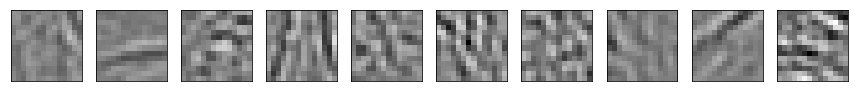

<Figure size 1080x216 with 0 Axes>

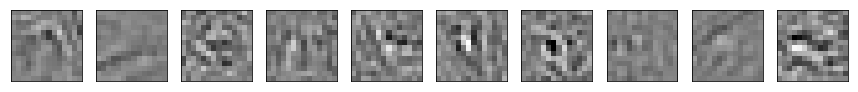

average of data patches =  0.0005292290528058102 +/- 0.01294243662199205
average of residual patches =  0.006543039834682536 +/- 0.01090592147173117
median energy of data =  0.3207632291015253
average energy of data =  0.31577017885349845 +/- 0.08954905884368769
average error =  0.006543039834682536 +/- 0.22431791803644618
average energy of residual =  0.2136495630364202 +/- 0.0686673425787743
median energy of residual =  0.21542920887057895
average gain of coding =  1.5126467918646311 +/- 0.23320068309115324
🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒
number of codes, size of codewords =  (1024, 441)
average of codewords =  0.031121056453910487
average std of codewords =  0.19893128774707158
l0-sparseness of codewords =  0.031329719387755105
std of the average of individual patches =  0.012509036632772308


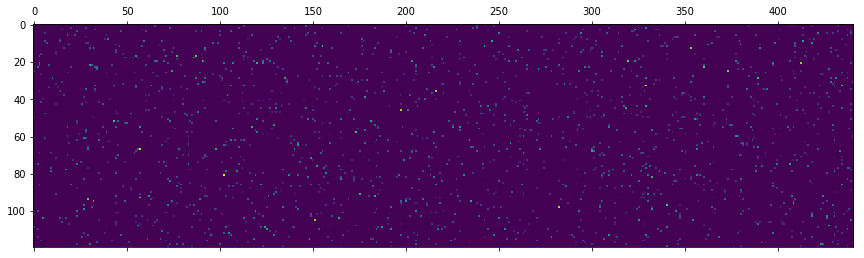

<Figure size 1080x216 with 0 Axes>

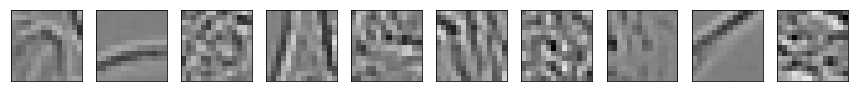

number of codes, size of reconstructed images =  (1024, 196)


<Figure size 1080x216 with 0 Axes>

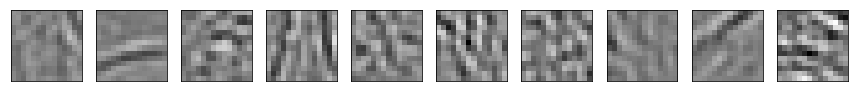

<Figure size 1080x216 with 0 Axes>

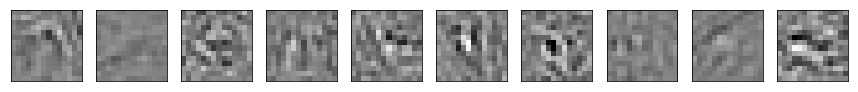

average of data patches =  0.0005292290528058102 +/- 0.01294243662199205
average of residual patches =  0.006464022474859311 +/- 0.010567915767317977
median energy of data =  0.3207632291015253
average energy of data =  0.31577017885349845 +/- 0.08954905884368769
average error =  0.006464022474859311 +/- 0.21756159450012208
average energy of residual =  0.20779024746000707 +/- 0.06479231473330818
median energy of residual =  0.2118384383924881
average gain of coding =  1.5485739827146476 +/- 0.21647058132427113
🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒
number of codes, size of codewords =  (1024, 441)
average of codewords =  0.03110412089035431
average std of codewords =  0.19868774101429823
l0-sparseness of codewords =  0.031371793509070295
std of the average of individual patches =  0.012333856490463936


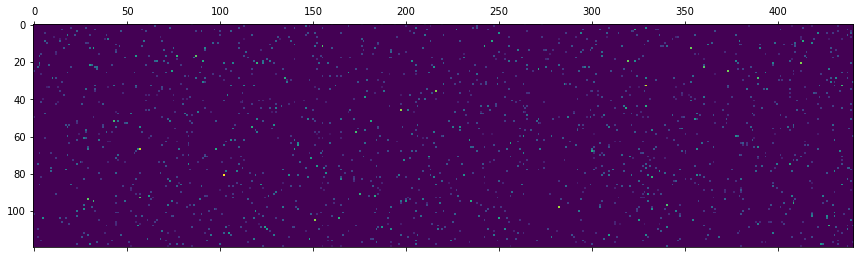

<Figure size 1080x216 with 0 Axes>

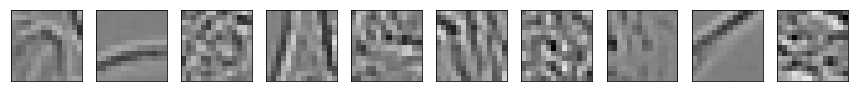

number of codes, size of reconstructed images =  (1024, 196)


<Figure size 1080x216 with 0 Axes>

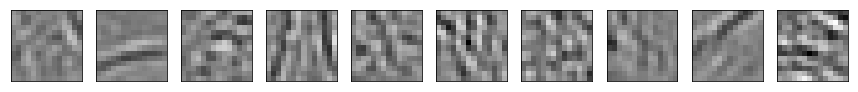

<Figure size 1080x216 with 0 Axes>

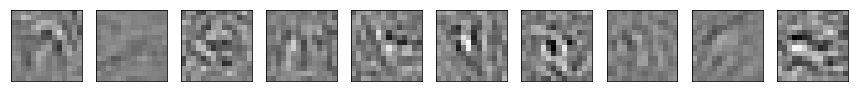

average of data patches =  0.0005292290528058102 +/- 0.01294243662199205
average of residual patches =  0.006461966853914281 +/- 0.010605389607973527
median energy of data =  0.3207632291015253
average energy of data =  0.31577017885349845 +/- 0.08954905884368769
average error =  0.006461966853914281 +/- 0.21749226688414422
average energy of residual =  0.20776209740128365 +/- 0.06464947063545412
median energy of residual =  0.21101855505322104
average gain of coding =  1.5481328896398256 +/- 0.21356694021029574


In [8]:
np.random.seed(1973)
#sparse_code = shl.code(data, dico_, matname=matname)
P_cum_zeroeffect = np.linspace(0, 1, shl.nb_quant, endpoint=True)[np.newaxis, :] * np.ones((shl.n_dictionary, 1))
#P_cum = dico_.P_cum
#P_cum = None
#l0_sparseness = 150
l0_sparseness = shl.l0_sparseness


from shl_scripts.shl_tools import show_data, print_stats
coding_gain = {}
for homeo_method in homeo_methods:
    coding_gain[homeo_method] = {}
    print(33*'🐶')
    print(15*'🐶' + homeo_method[:3] + 15*'🐶')
    print(33*'🐶')

    from shl_scripts.shl_encode import mp
    labels = ['Non', 'One', 'Hom']
    for P_cum, gain, label in zip([None, P_cum_zeroeffect, dico[homeo_method].P_cum], [np.ones(shl.n_dictionary), None, None], labels):
        sparse_code = mp(data[indx, :], dico[homeo_method].dictionary, precision=dico[homeo_method].precision, l0_sparseness=l0_sparseness, P_cum=P_cum, gain=gain)
        SD, SE = print_stats(data[indx, :], dico[homeo_method].dictionary, sparse_code)
        coding_gain[homeo_method][label] = (SD/SE).mean()


In [9]:
coding_gain

{'None': {'Non': 1.5033900785225693,
  'One': 1.5400019966940306,
  'Hom': 1.5421568970219572},
 'HAP': {'Non': 1.501583856353043,
  'One': 1.5341842077496006,
  'Hom': 1.5293048099239972},
 'HEH': {'Non': 1.5126467918646311,
  'One': 1.5485739827146476,
  'Hom': 1.5481328896398256}}

## Version used

In [10]:
%load_ext version_information
%version_information shl_scripts, numpy, shl_scripts, pandas, matplotlib

Software versions
Python 3.6.5 64bit [GCC 4.2.1 Compatible Apple LLVM 9.1.0 (clang-902.0.39.2)]
IPython 6.5.0
OS Darwin 17.7.0 x86_64 i386 64bit
shl_scripts 20171221
numpy 1.15.1
shl_scripts 20171221
pandas 0.23.4
matplotlib 3.0.0
Wed Sep 26 12:18:27 2018 CEST